In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mise en place

In [2]:
!unzip -F drive/My\ Drive/PythonDataset/HAPTDataSet.zip

Archive:  drive/My Drive/PythonDataset/HAPTDataSet.zip
replace features_info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
colonnes = []
with open("features.txt", "r") as f:
    for line in f.readlines():
        colonnes.append(line)
        print(line.strip())

tBodyAcc-Mean-1
tBodyAcc-Mean-2
tBodyAcc-Mean-3
tBodyAcc-STD-1
tBodyAcc-STD-2
tBodyAcc-STD-3
tBodyAcc-Mad-1
tBodyAcc-Mad-2
tBodyAcc-Mad-3
tBodyAcc-Max-1
tBodyAcc-Max-2
tBodyAcc-Max-3
tBodyAcc-Min-1
tBodyAcc-Min-2
tBodyAcc-Min-3
tBodyAcc-SMA-1
tBodyAcc-Energy-1
tBodyAcc-Energy-2
tBodyAcc-Energy-3
tBodyAcc-IQR-1
tBodyAcc-IQR-2
tBodyAcc-IQR-3
tBodyAcc-ropy-1
tBodyAcc-ropy-1
tBodyAcc-ropy-1
tBodyAcc-ARCoeff-1
tBodyAcc-ARCoeff-2
tBodyAcc-ARCoeff-3
tBodyAcc-ARCoeff-4
tBodyAcc-ARCoeff-5
tBodyAcc-ARCoeff-6
tBodyAcc-ARCoeff-7
tBodyAcc-ARCoeff-8
tBodyAcc-ARCoeff-9
tBodyAcc-ARCoeff-10
tBodyAcc-ARCoeff-11
tBodyAcc-ARCoeff-12
tBodyAcc-Correlation-1
tBodyAcc-Correlation-2
tBodyAcc-Correlation-3
tGravityAcc-Mean-1
tGravityAcc-Mean-2
tGravityAcc-Mean-3
tGravityAcc-STD-1
tGravityAcc-STD-2
tGravityAcc-STD-3
tGravityAcc-Mad-1
tGravityAcc-Mad-2
tGravityAcc-Mad-3
tGravityAcc-Max-1
tGravityAcc-Max-2
tGravityAcc-Max-3
tGravityAcc-Min-1
tGravityAcc-Min-2
tGravityAcc-Min-3
tGravityAcc-SMA-1
tGravityAcc-Energy-

## Visualisation des données

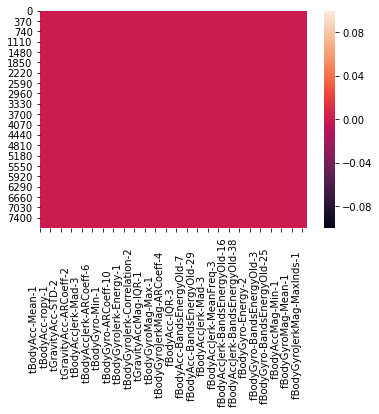

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

X_train = np.genfromtxt("Train/X_train.txt")
df = pd.DataFrame(X_train,columns=colonnes)

sns.heatmap(df.isna())

On vérifie visuellement si il y a des nuls dans notre data frame

In [0]:
X_train = np.genfromtxt("Train/X_train.txt")
Y_train = np.genfromtxt("Train/y_train.txt")

x = pd.DataFrame(X_train, columns=colonnes)
y = pd.DataFrame(Y_train, columns=["result"])

mapping = {1.0:"Walking",2.0:"Walking Upstairs", 3.0:"Walking Downstairs", 4.0:"Sitting", 5.0:"Standing", 6.0:"Laying", 7.0:"Stand to Sit", 8.0:"Sit to Stand", 9.0:"Sit to Lie", 10.0:"Lie to Sit", 11.0:"Stand to Lie", 12.0:"Lie to Stand"}
y['fullresults'] = y['result'].map(mapping)
results_tab = ["Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying", "Stand to Sit", "Sit to Stand", "Sit to Lie", "Lie to Sit", "Stand to Lie", "Lie to Stand"]
base = pd.concat([x,y], axis=1)

Text(0.5, 0.98, "Types de mouvements selon l'acceleration horizontale maximale")

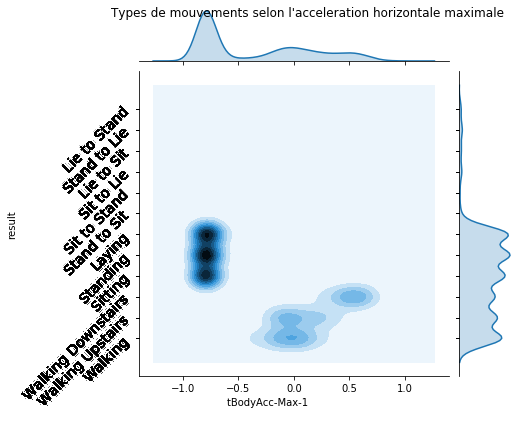

In [6]:
%matplotlib inline
g = sns.jointplot(base["tBodyAcc-Max-1                 \n"], base["result"], kind="kde")
g.ax_joint.set_yticks(y["result"])
g.ax_joint.set_yticklabels(y['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.fig.suptitle("Types de mouvements selon l'acceleration horizontale maximale")

Lorsque la personne est immobile (Couchée, Assise ou Debout) l'accélération horizontale maximale reste sensiblement la même, assez faible.
D'autre part, lorsqu'elle augmente, on a donc des positions plus mobiles, comme la marche normale ou la montée d'escaliers. En cas de descente d'escaliers elle est encore plus élevée.

Je me suis concentré sur les valeurs maximales parce qu'en prenant les moyennes le graphique était simplement centré comme ci-dessous.
Ce qui permettrait éventuellement de se rendre compte que la plupart des mesures ne concernent que les positions les plus courantes (Couché, Assis, Debout, et Marchant...)

Text(0.5, 0.98, "Types de mouvements selon l'acceleration horizontale moyenne")

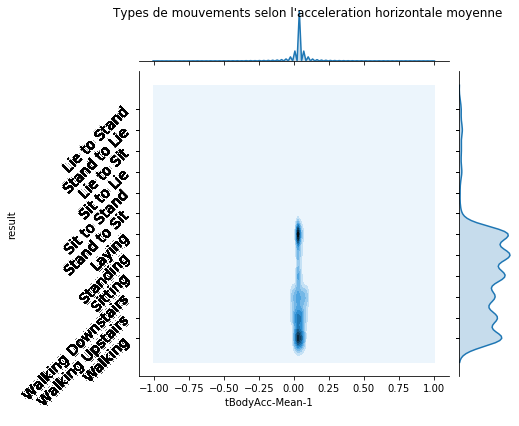

In [7]:
%matplotlib inline
g = sns.jointplot(base["tBodyAcc-Mean-1                \n"], base["result"], kind="kde")
g.ax_joint.set_yticks(y["result"])
g.ax_joint.set_yticklabels(y['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.fig.suptitle("Types de mouvements selon l'acceleration horizontale moyenne")

Text(0.5, 0.98, "Types de mouvements selon l'acceleration verticale maximale du corps")

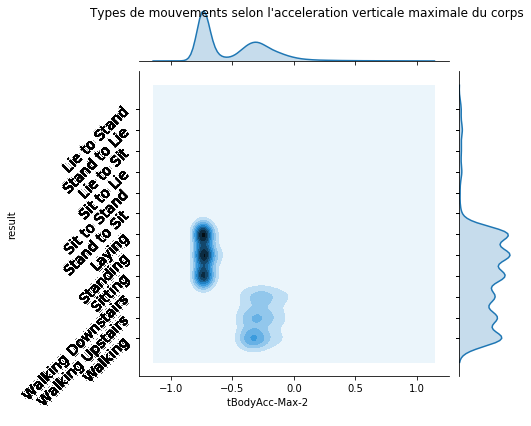

In [8]:
%matplotlib inline
g = sns.jointplot(base["tBodyAcc-Max-2                 \n"], base["result"], kind="kde")
g.ax_joint.set_yticks(y["result"])
g.ax_joint.set_yticklabels(y['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.fig.suptitle("Types de mouvements selon l'acceleration verticale maximale du corps")

Le graphique ressemble à celui des types de mouvements selon l'accéleration horizontale, la principale différence réside dans la descente d'escaliers.

Text(0.5, 0.98, "Types de mouvements selon l'inclinaison moyenne")

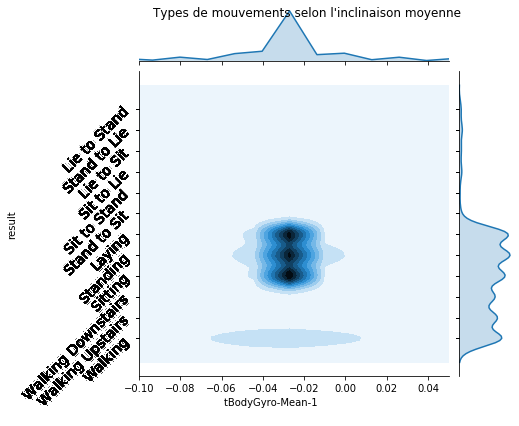

In [9]:
%matplotlib inline
g = sns.jointplot(base["tBodyGyro-Mean-1               \n"], base["result"], kind="kde")
g.ax_joint.set_yticks(y["result"])
g.ax_joint.set_yticklabels(y['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.ax_marg_x.set_xlim(-0.10,0.05)
g.fig.suptitle("Types de mouvements selon l'inclinaison moyenne")

Comme nous pouvions nous y attendre, les positions les plus immobiles ont des valeurs d'inclinaison beaucoup plus concentrées. Tandis que par exemple la marche présente des valeurs beaucoup plus étalées.

## Modélisation

Utilisons simplement un modèle dans un premier temps

In [0]:
def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

In [11]:
from sklearn.tree import DecisionTreeRegressor

X_test = np.genfromtxt("Test/X_test.txt")
Y_test = np.genfromtxt("Test/y_test.txt")

score = get_score(DecisionTreeRegressor(), X_train, X_test, Y_train, Y_test)
score

0.9153268961543323

Le résultat étant très proche de 1, il est satisfaisant.

Il serait cependant intéressant de comparer différents algorithmes.
Nous allons donc ajouter ce score et tous ceux des autres algorithmes à un dictionnaire.

In [0]:
performances = {}
algo = DecisionTreeRegressor()
performances[algo] = score

algo = DecisionTreeRegressor(random_state=1)
score = get_score(algo,X_train,X_test,Y_train,Y_test)
performances[algo] = score

from sklearn.ensemble import RandomForestRegressor
hyperparametres = {"n_estimators" : 30}
algo = RandomForestRegressor(**hyperparametres)
score = get_score(algo, X_train, X_test, Y_train, Y_test)
performances[algo] = score

hyperparametres = {"n_estimators" : 30, 
                  "max_features"  :  3,
                  "max_depth"     :  50,}
algo = RandomForestRegressor(**hyperparametres)
score = get_score(algo, X_train, X_test, Y_train, Y_test)
performances[algo] = score

from sklearn.ensemble import ExtraTreesRegressor

algo = ExtraTreesRegressor()
score = get_score(algo, X_train, X_test, Y_train, Y_test)
performances[algo] = score

In [13]:
!pip install catboost

In [14]:
from catboost import CatBoostRegressor

algo = CatBoostRegressor(task_type="CPU")
score = get_score(algo, X_train, X_test, Y_train, Y_test)
performances['CatBoost'] = score

0:	learn: 2.1066862	total: 213ms	remaining: 3m 33s
1:	learn: 2.0535993	total: 358ms	remaining: 2m 58s
2:	learn: 2.0041399	total: 504ms	remaining: 2m 47s
3:	learn: 1.9570010	total: 643ms	remaining: 2m 40s
4:	learn: 1.9086527	total: 793ms	remaining: 2m 37s
5:	learn: 1.8616150	total: 952ms	remaining: 2m 37s
6:	learn: 1.8167337	total: 1.09s	remaining: 2m 35s
7:	learn: 1.7755701	total: 1.23s	remaining: 2m 32s
8:	learn: 1.7331286	total: 1.38s	remaining: 2m 31s
9:	learn: 1.6914968	total: 1.52s	remaining: 2m 30s
10:	learn: 1.6527721	total: 1.66s	remaining: 2m 29s
11:	learn: 1.6139000	total: 1.8s	remaining: 2m 28s
12:	learn: 1.5762917	total: 1.95s	remaining: 2m 27s
13:	learn: 1.5404603	total: 2.09s	remaining: 2m 27s
14:	learn: 1.5060595	total: 2.23s	remaining: 2m 26s
15:	learn: 1.4728167	total: 2.38s	remaining: 2m 26s
16:	learn: 1.4393540	total: 2.52s	remaining: 2m 25s
17:	learn: 1.4078111	total: 2.67s	remaining: 2m 25s
18:	learn: 1.3772233	total: 2.81s	remaining: 2m 25s
19:	learn: 1.3459690	to

In [0]:
perfs_df = pd.DataFrame()
perfs_df["performance"] = performances.values()
perfs_df["algo"] = performances.keys()

Afin d'avoir un dictionnaire ordonné nous utilisons une classe issue de la bibliothèque `collections`

In [16]:
from collections import OrderedDict

ordered_dict = OrderedDict(performances)

ordered_perfs_df = pd.DataFrame()
ordered_perfs_df["performance"] = ordered_dict.values()
ordered_perfs_df["algo"] = ordered_dict.keys()
ordered_perfs_df["algo_name"] = ordered_perfs_df.algo.map(lambda algo: str(algo).split("(")[0])

ordered_perfs_df

,performance,algo,algo_name
0,0.915327,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",DecisionTreeRegressor
1,0.900726,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",DecisionTreeRegressor
2,0.947271,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",RandomForestRegressor
3,0.906144,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",RandomForestRegressor
4,0.951452,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",ExtraTreesRegressor
5,0.951832,CatBoost,CatBoost


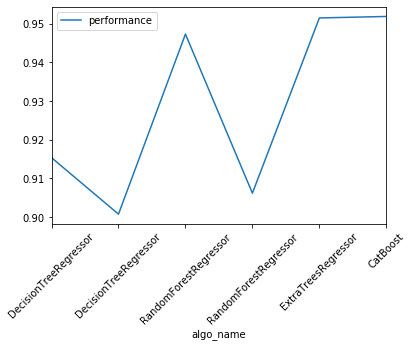

In [17]:
ordered_perfs_df.set_index("algo_name", inplace=True)

%matplotlib inline
ordered_perfs_df[["performance"]].plot(rot=45)

On peut voir que l'algorithme le plus performant est `CatBoost` vérifions donc sa stabilité 

0:	learn: 2.1066862	total: 142ms	remaining: 2m 21s
1:	learn: 2.0535993	total: 284ms	remaining: 2m 21s
2:	learn: 2.0041399	total: 430ms	remaining: 2m 22s
3:	learn: 1.9570010	total: 572ms	remaining: 2m 22s
4:	learn: 1.9086527	total: 718ms	remaining: 2m 22s
5:	learn: 1.8616150	total: 856ms	remaining: 2m 21s
6:	learn: 1.8167337	total: 996ms	remaining: 2m 21s
7:	learn: 1.7755701	total: 1.13s	remaining: 2m 20s
8:	learn: 1.7331286	total: 1.28s	remaining: 2m 20s
9:	learn: 1.6914968	total: 1.41s	remaining: 2m 19s
10:	learn: 1.6527721	total: 1.56s	remaining: 2m 20s
11:	learn: 1.6139000	total: 1.7s	remaining: 2m 19s
12:	learn: 1.5762917	total: 1.85s	remaining: 2m 20s
13:	learn: 1.5404603	total: 1.99s	remaining: 2m 19s
14:	learn: 1.5060595	total: 2.13s	remaining: 2m 19s
15:	learn: 1.4728167	total: 2.28s	remaining: 2m 20s
16:	learn: 1.4393540	total: 2.42s	remaining: 2m 19s
17:	learn: 1.4078111	total: 2.57s	remaining: 2m 20s
18:	learn: 1.3772233	total: 2.7s	remaining: 2m 19s
19:	learn: 1.3459690	tot

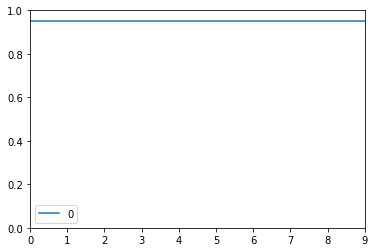

In [18]:
stab = []
algo = CatBoostRegressor(task_type="CPU")
for i in range(10):
    score = get_score(algo, X_train, X_test, Y_train, Y_test )
    stab.append(score)

%matplotlib inline
_ = pd.DataFrame(stab)
_.plot(ylim=[0,1])

Puisque en plus d'etre le plus performant, l'algorithme est stable au cours de 10 exécutions, c'est le plus performant pour notre modèle